### Import các thư viện cần thiết

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ast import literal_eval
pd.set_option('display.max_columns', None)

### Đọc dữ liệu

In [2]:
data_df = pd.read_csv("../kham_pha_du_lieu/animals_split_info.csv", index_col = 0)
# data_df = data_df.drop(columns = data_df.columns[0], axis = 1)
data_df

/home/lexua/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Name,Kingdom,Phylum,Subphylum,Class,Order,Suborder,Family,Genus,Species,Population size,Life span,Top speed,Weight,Height,Length,Biome,Climate,Mating behavior,Reproduction season,Pregnancy duration,Baby carrying,Independent age,Female name,Male name,Baby name,Incubation period,Population trend,Population status,Attributes,Continents,Subcontinents,Countries,Regions,Wwf biomes,Group name,Diet,Biogeographical realms,Lifestyle,Seasonal behavior,BC_min,BC_max
0,Grey Wolf,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Canidae,Canis,Canis lupus,"400,000",15.0,75.0,38.0,0.825,1.325,"['Wetlands ', 'Shrubland', 'Forest', 'Mountain...","['Temperate', 'Cold', 'Polar', 'Tropical']",Monogamy,January-April,60-63 days,1-14 pups,45 days,bitch,dog,"pup, whelp",NaN,Stable,Least concern (LC),"['Nocturnal', 'Carnivore', 'Scavenger', 'Terre...","['Asia', ' Europe', ' North America', ' Africa']","['South Asia', ' Western Asia', ' Southeast As...","['Albania', ' Armenia', ' Azerbaijan', ' Belar...","['Czech Republic', ' Estonia', ' Finland', ' F...","['Nearctic', ' Palearctic', ' Indomalayan', ' ...","['pack', ' route', ' rout']","['Carnivore', '', 'Scavenger']",['Greenland'],"['Terrestrial', ' Cursorial', ' Altricial', ' ...",['Not a migrant'],1.0,14.0
1,Tiger,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Feliformia,Felidae,Panthera,Panthera tigris,"2,154-3,159",12.5,96.0,185.5,NaN,2.950,"['Forest', 'Rainforest', 'Montane forest', 'Ri...","['Tropical', 'Temperate']",Polygyny,November-April,103 days,1-7 cubs,18 mos-3 yrs,NaN,NaN,cub,NaN,Decreasing,Endangered (EN),"['Nocturnal', 'Carnivore', 'Cursorial', 'Terre...",['Asia'],"['South Asia', ' Southeast Asia', ' East Asia']","['Bangladesh', ' Bhutan', ' China', '', ' Indi...",['Thailand'],"['Palearctic', ' Indomalayan']",[],['Carnivore'],"['Tibet', ' Yunnan']","['Cursorial', ' Terrestrial', ' Ambush predato...",['Not a migrant'],1.0,7.0
2,Brown Bear,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Ursidae,Ursus,Ursus arctos,"200,000",35.0,56.0,367.5,1.115,2.100,"['Forest', 'Woodland']","['Temperate', 'Cold', 'Polar']","Polygynandry,",May-July,8 weeks,1-4 cubs,2-4 years,sow,boar,cub,NaN,Stable,Least concern (LC),"['Crepuscular', 'Omnivore', 'Terrestrial', 'Al...","['Asia', ' Europe', ' North America']","['South Asia', ' Western Asia', ' East Asia', ...","['Albania', ' Armenia', ' Austria', ' Azerbaij...",[],"['Nearctic', ' Palearctic', ' Indomalayan']","['sloth', ' sleuth']",['Omnivore'],"['Estonia', ' Finland', ' France', ' Georgia',...","['Terrestrial', ' Altricial', ' Nomadic', ' Te...","['Hibernating', ' Migrating']",1.0,4.0
3,Blue Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Balaenopteridae,Balaenoptera,Balaenoptera musculus,10-25 Thou,85.0,20.0,130000.0,NaN,27.500,"['Oceanic pelagic zone', 'Marine', 'Neritic zo...","['Tropical', 'Temperate', 'Cold', 'Polar']",Monogamy,winter or early spring,1 year,1 calf,8 months,cow,bull,calf,NaN,Increasing,Endangered (EN),"['Carnivore', 'Piscivores', 'Aquatic', 'Precoc...","['Africa', ' South America', ' Oceania', ' Nor...","['Sub-Saharan Africa', ' Caribbean Islands', '...","['Angola', ' Argentina', ' Australia', ' Baham...","['Chile', ' China', ' Colombia', ' Comoros', '...",[],"['pod', ' gam', ' herd', ' school', ' mod']","['Carnivore', '', 'Piscivores']","['Atlantic Ocean', ' Pacific Ocean']","['Aquatic', ' Precocial', ' Natatorial', ' Viv...",['Migrating'],1.0,NaN
4,Killer Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Delphinidae,Orcinus,Orcinus orca,"50,000",65.0,45.0,4500.0,NaN,7.500,"['Oceanic pelagic zone', 'Marine', 'Neritic zo...","['Tropical', 'Temperate', 'Cold', 'Polar']",Polygynandry,"year-round, usually in summer",15-18 months,1 calf,2 years,cow,bull,calf,NaN,NaN,Data deficient (DD),"['Diurnal', 'Carnivore', 'Aquatic', 'Precocial...","['Africa', ' Oceania', ' Antarctica', ' North ...","['North Africa', ' Caribbean Islands', ' South...","['Algeria', ' Antigua', 'Barbuda', ' Argentina...","['Br

## Đưa ra các câu hỏi cần trả lời

### Câu hỏi 1: Động vật thích sống ở đâu nhất?

Trả lời câu hỏi này giúp chúng ta hiểu rõ hơn về môi trường, khí hậu ưa thích của các loài động vật, những nơi như thế nào thì có động vật phong phú, nơi nào thì là điều kiện sống khắc nghiệt đối với động vật.

Với tập dữ liệu hiện có, chúng ta có thể trả lời 2 vấn đề: Môi trường sống ưa thích của đa số các loài động vật, kiểu khí hậu ưa thích của các loài động vật

Chúng ta có làm việc với các cột có dữ liệu kiểu list, nhưng hiện tại kiểu dữ liệu của cột chưa phải là list, nên cần thao tác chuyển các cột này về kiểu list.

In [3]:
def try_eval(inp):
    try:
        return literal_eval(inp)
    except:
        return []


for i in data_df:
    if type(data_df[i][0]) == str and data_df[i][0][0] == "[":
        data_df[i] = data_df[i].apply(try_eval)

Trong quá trình trả lời câu hỏi, sẽ cần vẽ 1 số biểu đồ, thế nên cần chuẩn bị các hàm để vẽ biểu đồ

In [4]:
def draw_bar_chart(data, title, xlabel, ylabel):
    plt.barh(data.keys(),data.values, height = 0.8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

**Theo môi trường sống**

Để biết các loại động vật thích sống ở môi trường nào, dựa vào thông tin ở cột `Biome`, đếm số loài động vật xuất hiện trong các môi trường đó, sau đó biểu diễn bằng biểu đồ cột để biểu diễn, qua đó nhìn ra môi trường sống ưa thích của đa số các loài động vật.

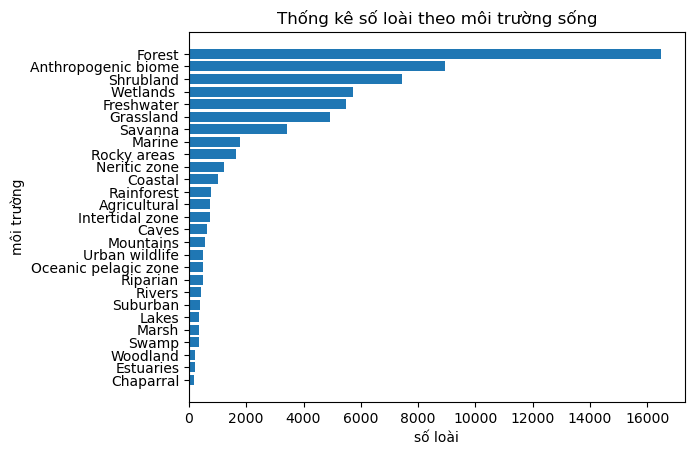

In [5]:
animal_by_biome = data_df['Biome'].explode().value_counts()
draw_bar_chart(animal_by_biome[26::-1], 'Thống kê số loài theo môi trường sống', 'số loài', 'môi trường')

Qua biểu đồ trên ta có thể rút ra được kết luận: 
- Môi trường sống có nhiều loại động vật sống nhất là trong rừng, muốn gặp được nhiều loại động vật đa dạng thì nơi tốt nhất sẽ là trong các khu rừng.
- Con người cũng đã sống chung được với rất nhiều loài động vât (Theo bộ dữ liệu này), các loài động vật khác trong tự nhiên thường sống ở trong rừng, cây bụi, đất ngập nước, trong nước ngọt, đồng cỏ, thảo nguyên.

**Theo điều kiện khí hậu**

Tiếp đến chúng ta sẽ cùng tìm hiểu loại khí hậu ưa thích của các đa số các loài động vật. Thông tin từ cột `Climate` có thể cho biết kiểu khí hậu mà loài động vật sống. Thực hiện công việc tương tự vừa làm ở trên, tìm hiểu kiểu khí hậu sống của các loài động vật

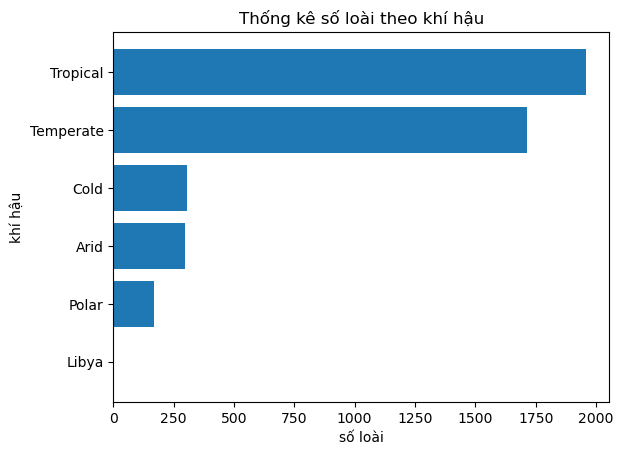

In [6]:
animal_by_climate = data_df['Climate'].explode().value_counts()
draw_bar_chart(animal_by_climate[::-1], 'Thống kê số loài theo khí hậu', 'số loài', 'khí hậu')

Có vẻ cột này dữ liệu bị miss khá nhiều, nhưng số dữ liệu còn lại cũng không phải là quá ít, cũng có thể dùng.

Qua biểu đồ này, chúng ta liền có thể nhìn ra các loại động vật thích sống ở vùng khí hậu nhiệt đới và ôn đới. Mà điều này cũng không lấy làm lạ, rõ là các kiểu khí hậu quá mức lạnh giá hay khô khan rất khắc nghiệt, khó có nhiều loài động vật sinh sống.

### Câu hỏi 2: Chủng loài nào xuất hiện nhiều nơi  trên trái đất nhất

Trả lời câu hỏi này giúp chúng ta hiểu rõ hơn về sự phân bố của các chủng loài trên trái đất.

Chủng loài nói đến ở đây là bậc phân loại. Chúng ta cần chọn một bậc phân loại phù hợp để trả lời câu hỏi này. Bậc Ngành thì quá chung chung, mà nếu chọn mức phân loại thấp như chi, loài thì số lượng quá nhiều. Vì vậy nhóm chúng em quyết định chọn bậc phân loại là Lớp và Bộ. Vậy câu hỏi của chung ta sẽ là Lớp (Bộ) nào xuất hiện nhiều nhất trên trái đất.

Ở câu hỏi này, chúng ta xét đến tính đa dạng của các Lớp (Bộ), thế nên không tính trên số lượng cá thể của loài, mà dựa trên số loài khác nhau của Lớp (Bộ). Lớp (Bộ) xuất hiện nhiều nhất trên trái đất là Lớp (Bộ) có nhiều loài động vật xuất hiện nhiều nơi trên trái đất. Với mỗi loài, 1 vị trí trên trái đất của loài sẽ +1 điểm cho Lớp (Bộ) đó.

Ví dụ: 
- Lớp A có 100 loài, mỗi loài xuất hiện trung bình 5 địa điểm khác nhau, lớp A có 500 điểm.
- Lớp B có 80 loài, nhưng mỗi loài xuất hiện trung bình ở 10 địa điểm khác nhau trên trái đất, lớp B có 800 điểm.

Qua đây, chúng ta có thể thấy lớp B xuất hiện nhiều nơi trên trái đất hơn là lớp A. Nên không nhất thiết Lớp nào có nhiều loài hơn thì sẽ xuất hiện nhiều nơi trên trái đất hơn.

Chúng ta sẽ phân tích trên 2 mức: Mức lục địa và Mức quốc gia.

In [7]:
animal_by_continents = data_df[['Order','Class','Continents']]
animal_by_continents=animal_by_continents.explode('Continents')

animal_by_countries = data_df[['Order','Class','Countries']]
animal_by_countries=animal_by_countries.explode('Countries')

**Theo cấp bậc phân loại Lớp**

Mức lục địa:

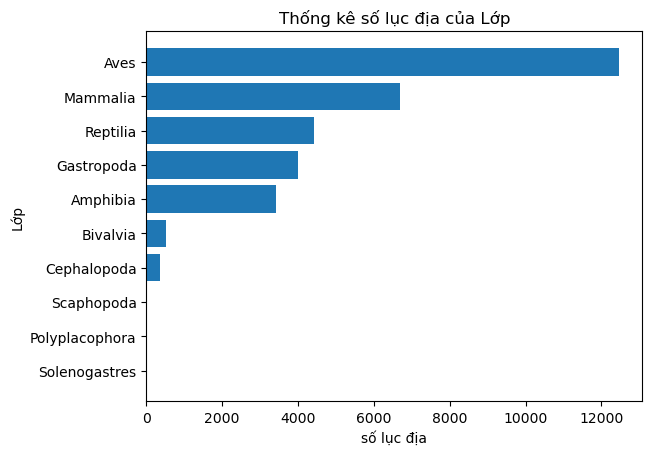

In [8]:
df = animal_by_continents['Class'].value_counts()
draw_bar_chart(df.sort_values(), 'Thống kê số lục địa của Lớp', 'số lục địa', 'Lớp')

Mức quốc gia:

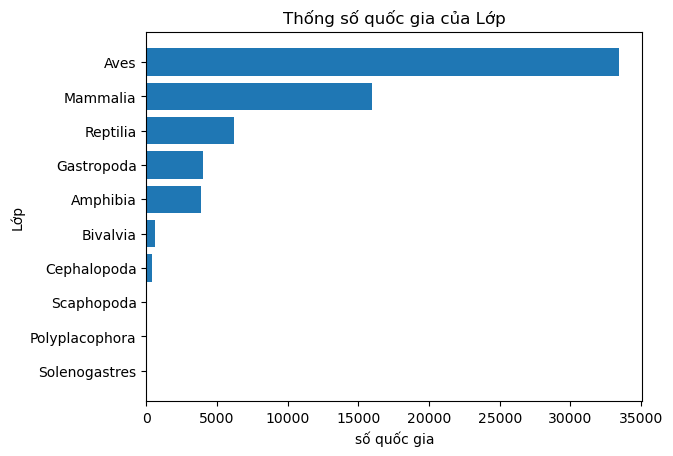

In [9]:
df = animal_by_countries['Class'].value_counts()
draw_bar_chart(df.sort_values(), 'Thống số quốc gia của Lớp', 'số quốc gia', 'Lớp')

**Nhận xét**
- Nhìn chung thì lớp 'Aves' (chim), 'Mamalia' (thú) phân bố nhiều nơi trên trái đất nhất.
- Xét qua 2 mức lục đia và quốc gia, nhìn chung thì vị trí không thay đổi, nhưng tỉ lệ giữa các cột đã có sự thay đổi. Lấy cột dài nhất 'Aves' làm mốc, thì các cột khác có vẻ đã bị ngắn đi. (Có lẽ vì chim biết bay nên phân bố rộng hơn?)

**Theo cấp bậc phân loại Bộ**

Mức lục địa:

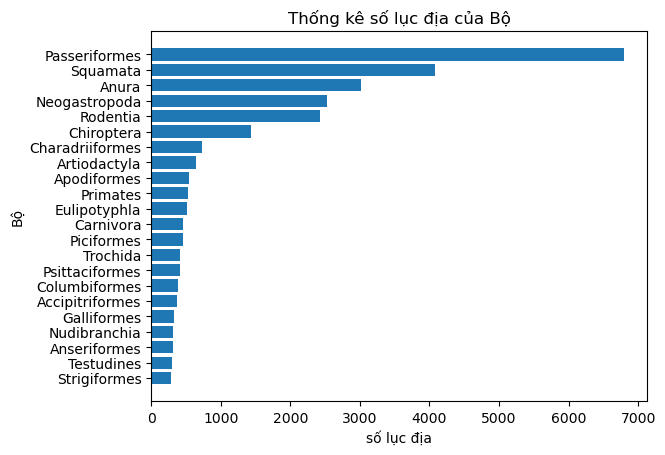

In [10]:
df = animal_by_continents['Order'].value_counts()
df = df.sort_values(ascending=False)[:22]
draw_bar_chart(df[-1::-1], 'Thống kê số lục địa của Bộ', 'số lục địa', 'Bộ')

Mức quốc gia:

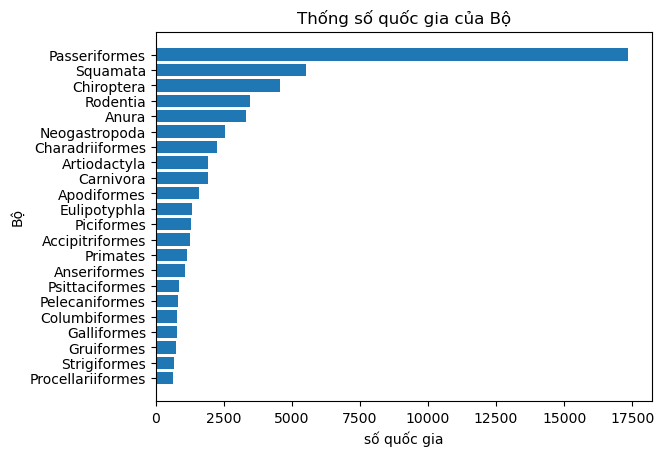

In [11]:
df = animal_by_countries['Order'].value_counts()
df = df.sort_values(ascending=False)[:22]
draw_bar_chart(df[-1::-1], 'Thống số quốc gia của Bộ', 'số quốc gia', 'Bộ')

**Nhận xét**
- Các bộ xuất hiện nhiều nơi trên trái đất nhất là 'Passeriformes', 'Neogastropoda', 'Rodentia', 'Anura', 'Squamata', 'Chiroptera'.
- Qua 2 biểu đồ thì chúng ta đã nhìn thấy sự thay đổi tỉ lệ giữa các cột và cả vị trí của top 2 đến top 5 ở mức lục địa. Chứng tỏ mức độ phân bố rộng hẹp của các loài cũng rất khác nhau. Có loài sống rải rác khắp nơi, phân bố rộng rãi. Có những loài chỉ sống ở những khu vực nhất định. Trong đó các loài chim phân bố rộng rãi nhất.